# Assessing Customer Churn

![Cartoon of telecom customers](IMG_8811.png)


## Introduction & Variable Description

The telecommunications (telecom) sector in India is rapidly changing, with more and more telecom businesses being created and many customers deciding to switch between providers. "Churn" refers to the process where customers or subscribers stop using a company's services or products. Understanding the factors that influence keeping a customer as a client in predicting churn is crucial for telecom companies to enhance their service quality and customer satisfaction. The goal for this project is to explore the intricate dynamics of customer behavior and demographics in the Indian telecom sector in predicting customer churn, utilizing two comprehensive datasets from four major telecom partners: Airtel, Reliance Jio, Vodafone, and BSNL:

- `telecom_demographics.csv` contains information related to Indian customer demographics:

| Variable             | Description                                      |
|----------------------|--------------------------------------------------|
| `customer_id `         | Unique identifier for each customer.             |
| `telecom_partner `     | The telecom partner associated with the customer.|
| `gender `              | The gender of the customer.                      |
| `age `                 | The age of the customer.                         |
| `state`                | The Indian state in which the customer is located.|
| `city`                 | The city in which the customer is located.       |
| `pincode`              | The pincode of the customer's location.          |
| `registration_event` | When the customer registered with the telecom partner.|
| `num_dependents`      | The number of dependents (e.g., children) the customer has.|
| `estimated_salary`     | The customer's estimated salary.                 |

- `telecom_usage` contains information about the usage patterns of Indian customers:

| Variable   | Description                                                  |
|------------|--------------------------------------------------------------|
| `customer_id` | Unique identifier for each customer.                         |
| `calls_made` | The number of calls made by the customer.                    |
| `sms_sent`   | The number of SMS messages sent by the customer.             |
| `data_used`  | The amount of data used by the customer.                     |
| `churn`    | Binary variable indicating whether the customer has churned or not (1 = churned, 0 = not churned).|


## Import Library and Data

In [56]:
# Import libraries and methods/functions
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as scp

from sklearn.preprocessing import StandardScaler, OneHotEncoder 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report)

In [14]:
# Load the data
telecom_demographics = pd.read_csv('telecom_demographics.csv')
telecom_usage = pd.read_csv('telecom_usage.csv')

# Merge the data
churn_df = telecom_demographics.merge(telecom_usage, on='customer_id')
display(churn_df.head(10))

,customer_id,telecom_partner,gender,age,state,city,pincode,registration_event,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn
0,15169,Airtel,F,26,Himachal Pradesh,Delhi,667173,2020-03-16,4,85979,75,21,4532,1
1,149207,Airtel,F,74,Uttarakhand,Hyderabad,313997,2022-01-16,0,69445,35,38,723,1
2,148119,Airtel,F,54,Jharkhand,Chennai,549925,2022-01-11,2,75949,70,47,4688,1
3,187288,Reliance Jio,M,29,Bihar,Hyderabad,230636,2022-07-26,3,34272,95,32,10241,1
4,14016,Vodafone,M,45,Nagaland,Bangalore,188036,2020-03-11,4,34157,66,23,5246,1
5,226400,BSNL,M,69,West Bengal,Delhi,737995,2023-02-07,4,90874,65,18,5961,1
6,231590,Reliance Jio,M,34,Punjab,Chennai,142400,2023-03-05,3,126886,16,17,5732,1
7,194307,BSNL,F,55,Arunachal Pradesh,Chennai,762756,2022-08-30,2,38923,45,-2,531,1
8,48459,Airtel,F,50,Maharashtra,Hyderabad,825280,2020-08-30,3,37305,-4,51,8292,1
9,156011,BSNL,M,38,Odisha,Kolkata,521017,2022-02-19,4,97705,22,36,6726,1


## EDA & Data Preprocessing

### Data Familirization

In [6]:
# Data Stucture
shape_info = f"Rows: {churn_df.shape[0]}, Columns: {churn_df.shape[1]}"
print(shape_info)

# Data Information
print("\nInfo:")
print(churn_df.info())

Rows: 6500, Columns: 14

Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6500 entries, 0 to 6499
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         6500 non-null   int64 
 1   telecom_partner     6500 non-null   object
 2   gender              6500 non-null   object
 3   age                 6500 non-null   int64 
 4   state               6500 non-null   object
 5   city                6500 non-null   object
 6   pincode             6500 non-null   int64 
 7   registration_event  6500 non-null   object
 8   num_dependents      6500 non-null   int64 
 9   estimated_salary    6500 non-null   int64 
 10  calls_made          6500 non-null   int64 
 11  sms_sent            6500 non-null   int64 
 12  data_used           6500 non-null   int64 
 13  churn               6500 non-null   int64 
dtypes: int64(9), object(5)
memory usage: 761.7+ KB
None


### Data Cleaning

In [7]:
# Check Missing Values
print("\nMissing values per column:")
print(churn_df.isnull().sum())


Missing values per column:
customer_id           0
telecom_partner       0
gender                0
age                   0
state                 0
city                  0
pincode               0
registration_event    0
num_dependents        0
estimated_salary      0
calls_made            0
sms_sent              0
data_used             0
churn                 0
dtype: int64


In [9]:
# Check Duplicates
duplicates = churn_df.duplicated().sum()
print("Number of duplicate values = %d" % (duplicates))

Number of duplicate values = 0


### Data Analysis

#### Univariate Analysis

In [13]:
#Basic Summary Statistics
display(churn_df.describe())

,customer_id,age,pincode,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn
count,6500.000000,6500.000000,6500.000000,6500.000000,6500.000000,6500.000000,6500.000000,6500.000000,6500.000000
mean,121035.576923,46.108615,548955.907077,1.982308,85529.193385,49.789538,24.257846,5000.956308,0.200462
std,70353.990092,16.443712,259874.312026,1.404659,37545.639180,29.799221,14.650736,2940.611928,0.400377
min,47.000000,18.000000,100045.000000,0.000000,20001.000000,-10.000000,-5.000000,-969.000000,0.000000
25%,60125.750000,32.000000,321550.000000,1.000000,52905.000000,25.000000,12.000000,2493.750000,0.000000
50%,120470.500000,46.000000,550163.500000,2.000000,85286.500000,50.000000,25.000000,4975.500000,0.000000
75%,181420.750000,60.000000,775155.500000,3.000000,118817.500000,75.000000,37.000000,7504.250000,0.000000
max,243505.000000,74.000000,999740.000000,4.000000,149977.000000,108.000000,53.000000,10919.000000,1.000000


In [43]:
# Check Churn Rate
print(churn_df["churn"].value_counts(normalize=True))

churn_rate = churn_df["churn"].sum() / len(churn_df)
print("\nChurn rate:", churn_rate)

0    0.799538
1    0.200462
Name: churn, dtype: float64

Churn rate: 0.20046153846153847


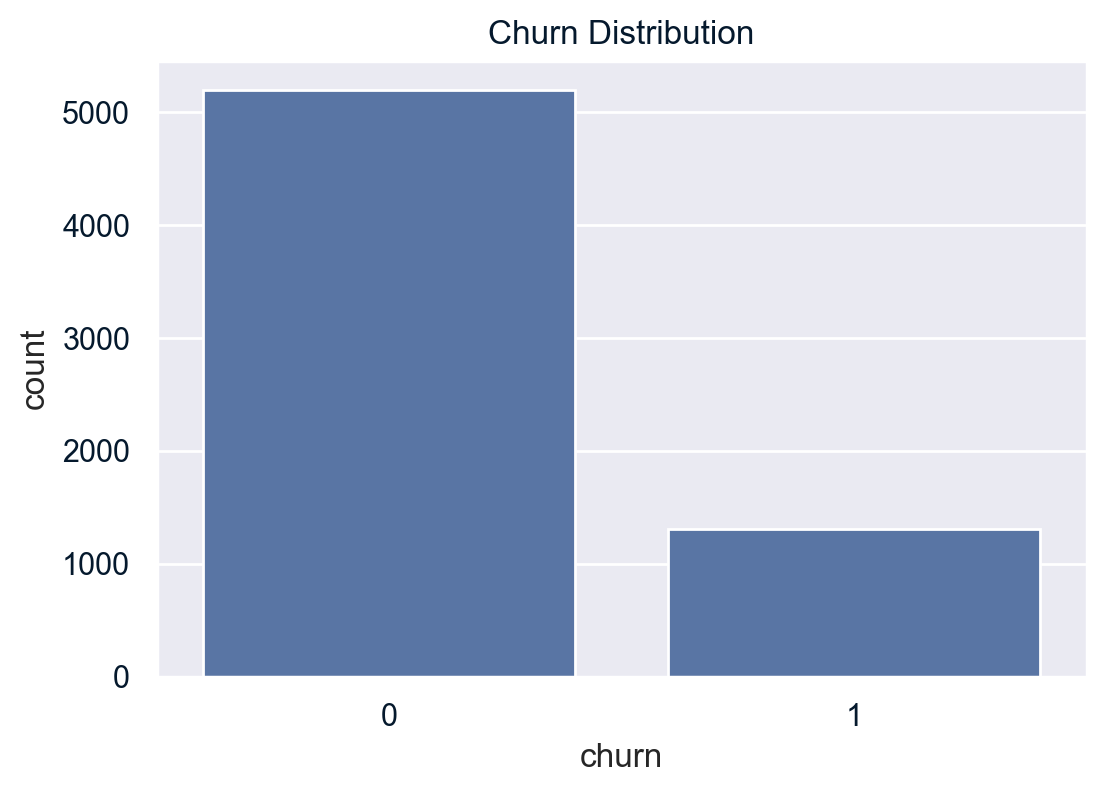

In [41]:
sns.countplot(x="churn", data=churn_df)
plt.title("Churn Distribution")
plt.show()

In [12]:
# Categorical Data
display(churn_df.describe(include=object))

,telecom_partner,gender,state,city,registration_event
count,6500,6500,6500,6500,6500
unique,4,2,28,6,1216
top,Reliance Jio,M,Karnataka,Delhi,2021-04-04
freq,1658,3909,260,1128,14


In [33]:
def countplot(column):
    sns.set(rc = {'figure.figsize':(6,4)}) 
    ax = sns.countplot(x= column, data= churn_df, order=churn_df[column].value_counts().index)
    ax.set_title((f"{column} distribution"))
    
    # Add counts + percentages above bars
    total = len(churn_df[column])
    for p in ax.patches:
        count = int(p.get_height())
        percent = 100 * count / total
        label = f'{count}\n({percent:.1f}%)'
        
        # Position: center of the bar
        ax.text(
            x=p.get_x() + p.get_width()/2,   # horizontal center
            y=p.get_height()/2,              # vertical middle
            s=label,
            ha='center', va='center',
            color='white', fontsize=9, fontweight='bold'
        )
    return ax

<AxesSubplot: title={'center': 'telecom_partner distribution'}, xlabel='telecom_partner', ylabel='count'>

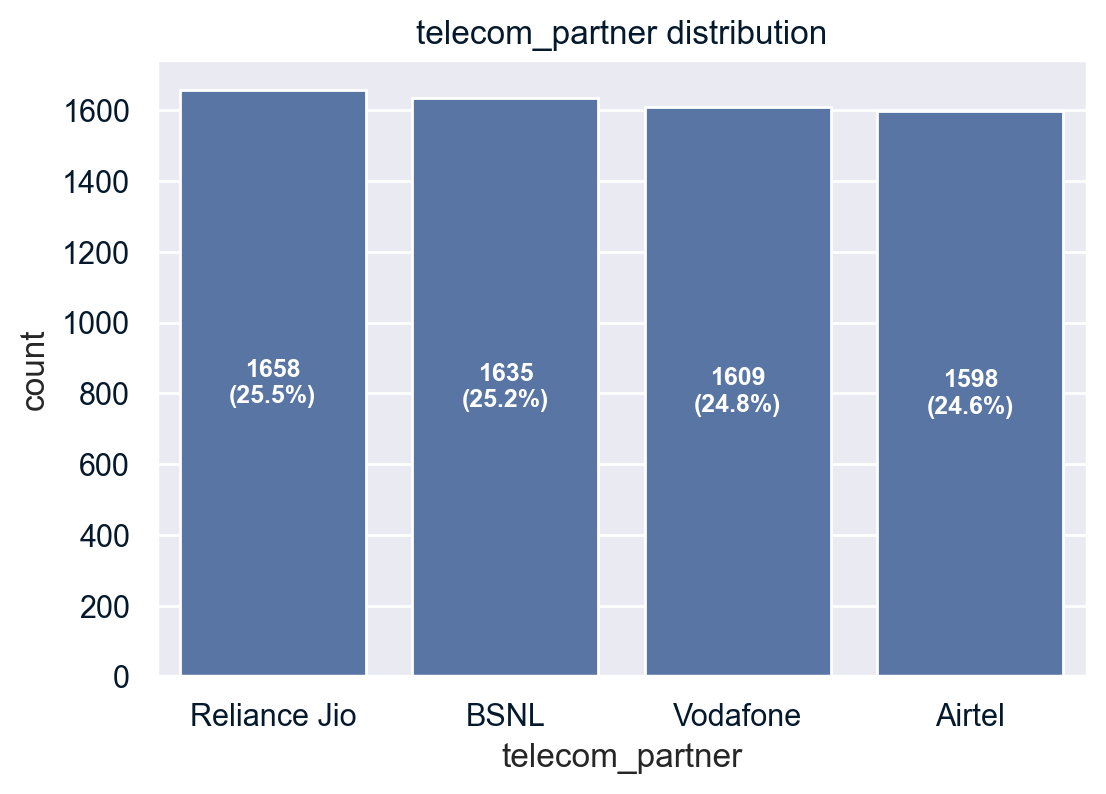

In [34]:
# Bar Plot for Telecom Partner
countplot('telecom_partner')

<AxesSubplot: title={'center': 'gender distribution'}, xlabel='gender', ylabel='count'>

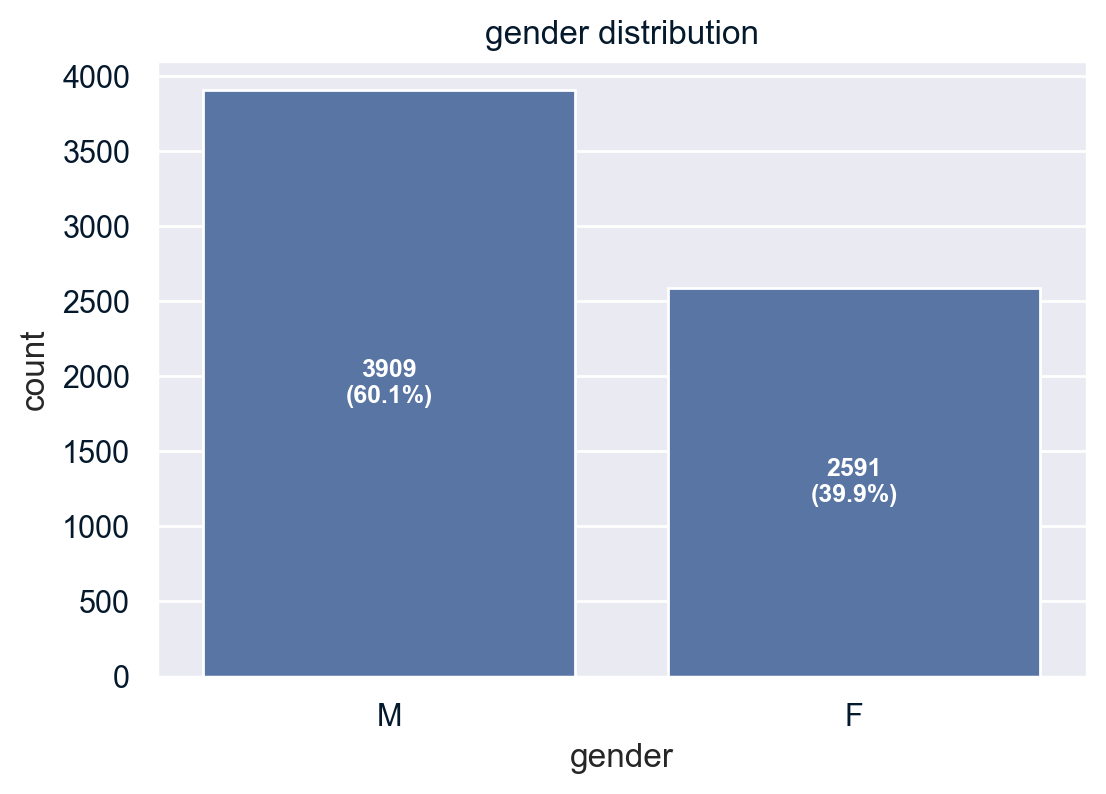

In [35]:
# Bar Plot for Gender
countplot('gender')

<AxesSubplot: title={'center': 'city distribution'}, xlabel='city', ylabel='count'>

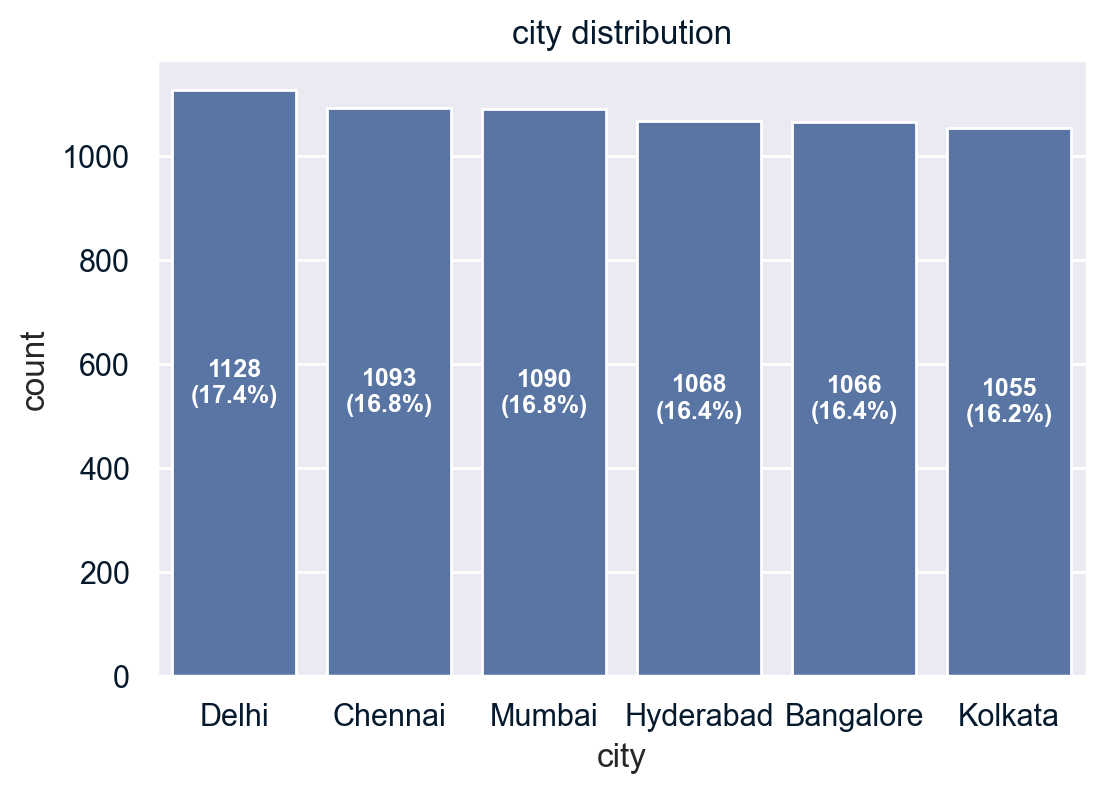

In [36]:
# Bar Plot for City
countplot('city')

#### Bivariate Analysis

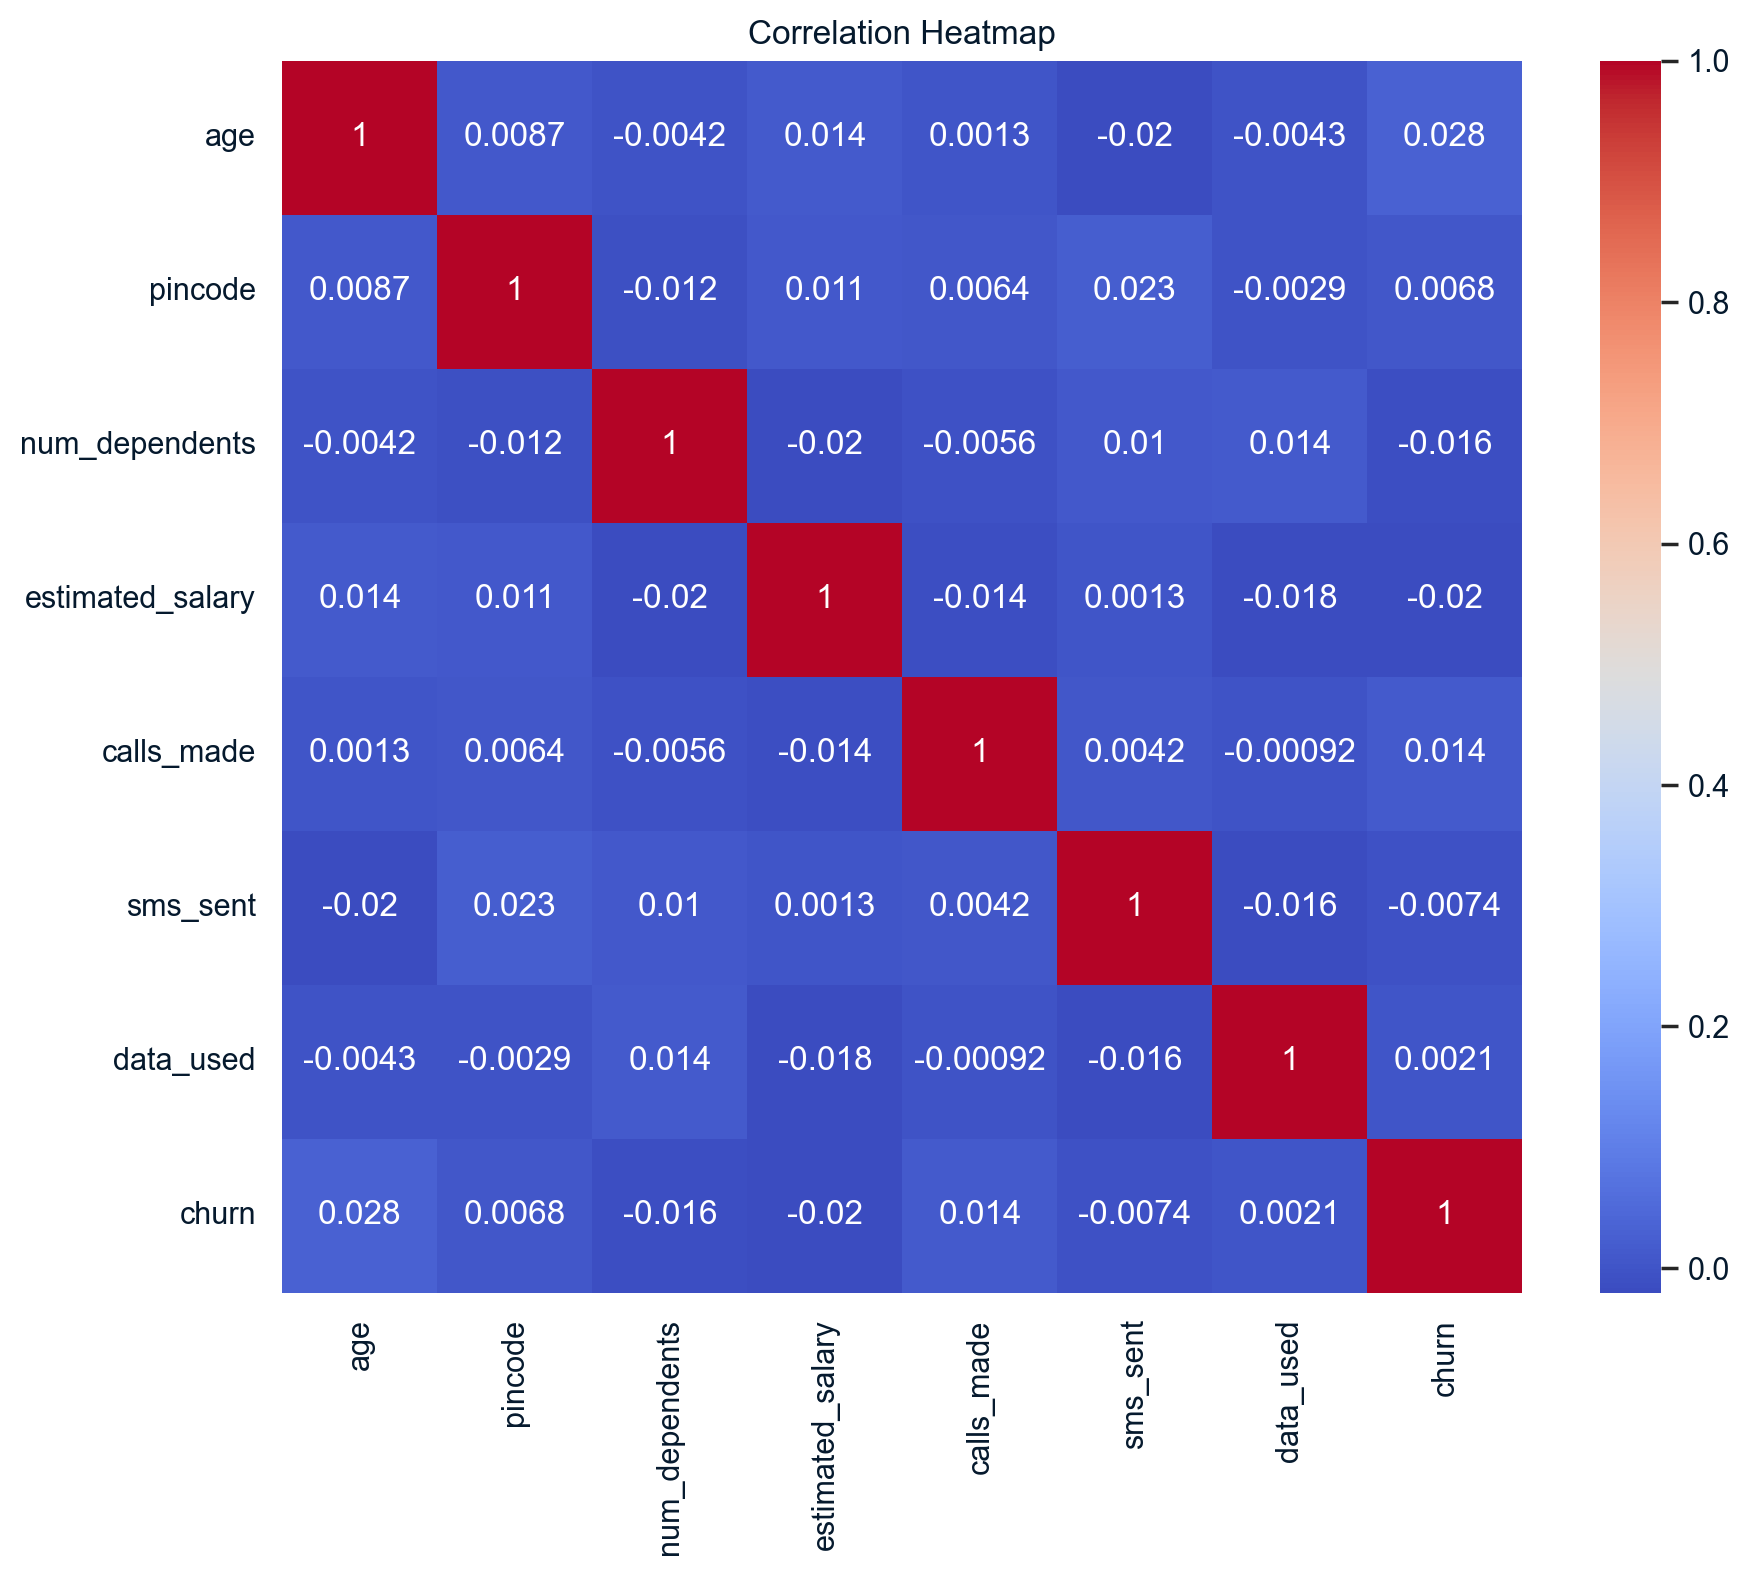

In [46]:
plt.figure(figsize=(10,8))
sns.heatmap(churn_df.drop(columns=['customer_id']).corr(method='pearson'), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

### Data Preprocessing

In [47]:
# Handle 'Date' Column
churn_df['registration_event'] = pd.to_datetime(churn_df['registration_event'], errors='coerce')

# Create derived features
churn_df['registration_year'] = churn_df['registration_event'].dt.year
churn_df['registration_month'] = churn_df['registration_event'].dt.month
churn_df['tenure_days'] = (pd.to_datetime("today") - churn_df['registration_event']).dt.days

In [48]:
# Drop Irrelevant or High Cardinality Columns
churn_df = churn_df.drop(columns=['customer_id', 'pincode', 'state','registration_event'], errors='ignore')

In [49]:
# Define Target and Features
y = churn_df['churn']
X = churn_df.drop(columns=['churn'])

In [50]:
#Encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [51]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

## Modeling

In [54]:
# Instantiate classifiers 
logreg_pred = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
rf_pred = RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced')

# Fit models 
logreg_pred.fit(X_train, y_train)
rf_pred.fit(X_train, y_train)

# Predictions 
y_pred_log = logreg_pred.predict(X_test)
y_pred_rf  = rf_pred.predict(X_test)

# For ROC AUC we need probabilities
y_proba_log = logreg_pred.predict_proba(X_test)[:,1]
y_proba_rf  = rf_pred.predict_proba(X_test)[:,1]

## Evaluation

In [57]:
# Evaluation function 
def evaluate_model(name, y_test, y_pred, y_proba):
    print(f"\n===== {name} =====")
    print("Accuracy :", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall   :", recall_score(y_test, y_pred))
    print("F1 Score :", f1_score(y_test, y_pred))
    print("ROC AUC  :", roc_auc_score(y_test, y_proba))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Run evaluation
evaluate_model("Logistic Regression", y_test, y_pred_log, y_proba_log)
evaluate_model("Random Forest", y_test, y_pred_rf, y_proba_rf)


===== Logistic Regression =====
Accuracy : 0.49923076923076926
Precision: 0.20454545454545456
Recall   : 0.5172413793103449
F1 Score : 0.2931596091205212
ROC AUC  : 0.49559147279103477

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.49      0.61      1039
           1       0.20      0.52      0.29       261

    accuracy                           0.50      1300
   macro avg       0.50      0.51      0.45      1300
weighted avg       0.68      0.50      0.55      1300

Confusion Matrix:
 [[514 525]
 [126 135]]

===== Random Forest =====
Accuracy : 0.7992307692307692
Precision: 0.0
Recall   : 0.0
F1 Score : 0.0
ROC AUC  : 0.4911331629661589

Classification Report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89      1039
           1       0.00      0.00      0.00       261

    accuracy                           0.80      1300
   macro avg       0.40      0.50      0.44  

Metrics Breakdown
- Accuracy = % of all predictions that are correct.
- Precision = Out of customers we predicted will churn, how many actually did?
- Recall (True Positive Rate)= Out of all customers who actually churned, how many did we catch?
- F1 Score = Harmonic mean of precision & recall.
- ROC AUC = Measures how well the model separates churners vs non-churners across all probability thresholds.

Confusion Matrix

[[TN, FP],
 [FN, TP]]

- TN = correctly predicted no churn.
- FP = predicted churn, but customer stayed.
- FN = predicted stay, but customer churned (dangerous!).
- TP = correctly predicted churn.

For churn: FN hurts the most → could miss real churners.

In [ ]:
higher_accuracy = "RandomForest"

**Evaluation**

If we're choosing based on higher accuracy only, Random Forest would be the answer. However, if we  want a meaningful churn model (catch actual churners), Logistic Regression is already more informative, even though accuracy is lower.

As the number of non-churners higher than the churner, it seems both models are struggling because of class imbalance (261 churn vs 1039 non-churn). The next steps that could be done is:
- Try SMOTE oversampling, undersampling, or class_weight='balanced' properly tuned.
- Adjust the probability threshold instead of the default 0.5.
